<a href="https://colab.research.google.com/github/LeetestOfCodes/usa-weather-vs-accidents/blob/main/usa_weather_car_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

April 19th, 2022

Kyle Balian, Promit Hossain



# How does precipitation relate to car accidents?

In this project, we decided to analyze a dataset encompassing most of the meteorological, temporal, and other forms of data surrounding car accidents in the United States between 2016 and 2021. We asked ourselves, "how does the amount of inches of precipitation affect the number of accidents on the road?" as we played around with the data. So, thinking it would be fairly simple, we got started on our journey, but through a myriad of different issues with the dataset and the ways in which to look at the data, this proved to be more of a lesson in dealing with feisty data than anything, all to arrive at a nice, nice graph at the end. We hope you enjoy!


## Setting up the Data

In [ ]:
#Importing all important packages
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download  sobhanmoosavi/us-accidents

 96% 259M/269M [00:01<00:00, 141MB/s]
100% 269M/269M [00:01<00:00, 167MB/s]


In [ ]:
! unzip us-accidents.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec21_updated.csv  


## Exploring the dataset from Kaggle

In summary, the dataset stores the records of 2.8 million car accidents that collectively occured in nearly 12 000 American cities between the year 2016 and 2021. The city with the highest total number of car accidents within those 6 years happens to be the city of Miami--despite not even being part of the top 20 most populated American cities. Among the 2.8 million reports of car accidents, nearly 550 000 of these reports do not have a reported measure of precipitation. Due to this issue, we will have to impute the missing values.

In [ ]:
df = pd.read_csv("US_Accidents_Dec21_updated.csv")

pd.set_option('display.max_columns', None)
df.sample(3)
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
# displays total number of missing values for  each column
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [ ]:
# displays total number of null values for the column 'Precipitation(in)'
df['Precipitation(in)'].isna().sum()

549458

In [ ]:
# the first component displays total number of car accidents reported from 2016 to 2021
df.shape


(2845342, 47)

In [ ]:
# displays the total number of cities from which data has been pulled
df['City'].nunique()


11681

In [ ]:
# number of accidents in each American city wihin 5 years
df["City"].value_counts()

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

## Filling out the missing precipitation values 


In order to fill out the missing precipitation values, it was necessary to create a copy of the original dataset. We only included columns that could potentially be a factor to precipitation and had less than 100 000 missing values.

In [ ]:
# makes new, smaller dataset with potentially related variables to precipitation
relevant_data = df[['Precipitation(in)', 'Visibility(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)']].copy()


In [ ]:
relevant_data.sample(5)

,Precipitation(in),Visibility(mi),Temperature(F),Humidity(%),Pressure(in)
110589,0.19,2.0,57.9,84.0,29.97
1471939,0.00,10.0,61.0,72.0,29.66
2686937,NaN,10.0,72.0,57.0,30.31
300892,0.00,10.0,90.0,62.0,29.92
2837115,0.00,7.0,68.0,90.0,29.90


In [ ]:
# displays how many missing values there are for precipitation
relevant_data["Precipitation(in)"].isna().sum()

549458

We paired each of the four selected variables with the precipitation and plotted their respective scatter plots. It is important to mention that only rows without missing values were included. Following the scatter plot, we calculated their RMSE values to determine which one of the variables had the lowest RMSE value and determined that the pair that included pressure met the desired condition.

Text(0, 0.5, 'Precipitation(in)')

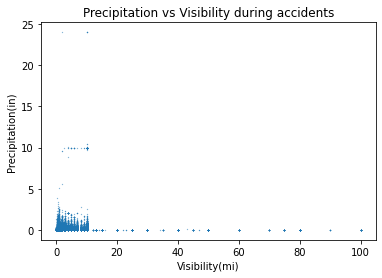

In [ ]:
x_ax = relevant_data["Visibility(mi)"]
y_ax = relevant_data["Precipitation(in)"]
plt.scatter(x_ax, y_ax, s=0.05)
plt.title("Precipitation vs Visibility during accidents")
plt.xlabel("Visibility(mi)")
plt.ylabel("Precipitation(in)")

In [ ]:
precip_and_visib = relevant_data[["Precipitation(in)", "Visibility(mi)" ]].copy().dropna()

model = LinearRegression()
model.fit(
    X=precip_and_visib["Visibility(mi)"].values.reshape(-1,1), 
    y=precip_and_visib["Precipitation(in)"]
    )

math.sqrt(
    mean_squared_error(
        y_true=precip_and_visib["Precipitation(in)"], y_pred=model.predict(precip_and_visib["Visibility(mi)"].values.reshape(-1,1))
        )
            )

0.08756531545700348

Text(0, 0.5, 'Precipitation(in)')

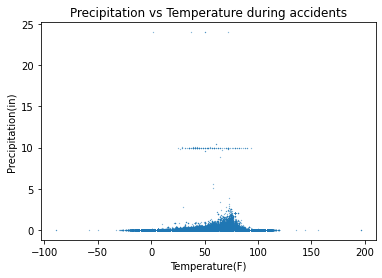

In [ ]:
x_ax = relevant_data["Temperature(F)"]
y_ax = relevant_data["Precipitation(in)"]
plt.scatter(x_ax, y_ax, s=0.05)
plt.title("Precipitation vs Temperature during accidents")
plt.xlabel("Temperature(F)")
plt.ylabel("Precipitation(in)")

In [ ]:
precip_and_temp = relevant_data[["Precipitation(in)", "Temperature(F)", ]].copy().dropna()

model = LinearRegression()
model.fit(
    X=precip_and_temp["Temperature(F)"].values.reshape(-1,1), 
    y=precip_and_temp["Precipitation(in)"]
    )

math.sqrt(
    mean_squared_error(
        y_true=precip_and_temp["Precipitation(in)"], y_pred=model.predict(precip_and_temp["Temperature(F)"].values.reshape(-1,1))
        )
            )


0.09371634343730595

Text(0, 0.5, 'Precipitation(in)')

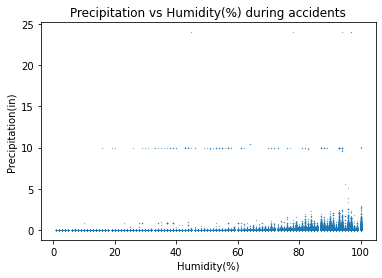

In [ ]:
x_ax = relevant_data["Humidity(%)"]
y_ax = relevant_data["Precipitation(in)"]
plt.scatter(x_ax, y_ax, s=0.05)
plt.title("Precipitation vs Humidity(%) during accidents")
plt.xlabel("Humidity(%)")
plt.ylabel("Precipitation(in)")

In [ ]:
precip_and_humid = relevant_data[["Precipitation(in)", "Humidity(%)", ]].copy().dropna()

model = LinearRegression()
model.fit(
    X=precip_and_humid["Humidity(%)"].values.reshape(-1,1), 
    y=precip_and_humid["Precipitation(in)"]
    )

math.sqrt(
    mean_squared_error(
        y_true=precip_and_humid["Precipitation(in)"], y_pred=model.predict(precip_and_humid["Humidity(%)"].values.reshape(-1,1))
        )
            )


0.09322166220472414

Text(0, 0.5, 'Precipitation(in)')

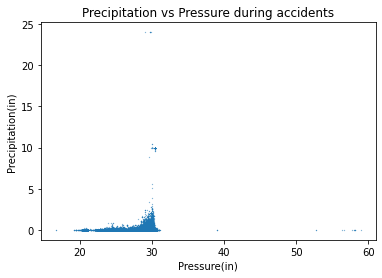

In [ ]:
x_ax = relevant_data["Pressure(in)"]
y_ax = relevant_data["Precipitation(in)"]
plt.scatter(x_ax, y_ax, s=0.05)
plt.title("Precipitation vs Pressure during accidents")
plt.xlabel("Pressure(in)")
plt.ylabel("Precipitation(in)")

In [ ]:
precip_and_pressure = relevant_data[["Precipitation(in)", "Pressure(in)" ]].copy().dropna()

model = LinearRegression()
model.fit(
    X=precip_and_pressure["Pressure(in)"].values.reshape(-1,1), 
    y=precip_and_pressure["Precipitation(in)"]
    )

math.sqrt(
    mean_squared_error(
        y_true=precip_and_pressure["Precipitation(in)"], y_pred=model.predict(precip_and_pressure["Pressure(in)"].values.reshape(-1,1))
        )
            )



0.0850488076771367

After selecting the variable which shared the lowest RMSE value with precipitation, it was then necessary to impute the missing values. With imputation, every row with null value was successfully filled. However, it is important to note that some of the filled precipitation values will be negative due to the nature of the iterative imputer.

In [ ]:
most_correlative_data = relevant_data[["Precipitation(in)", "Pressure(in)"]].copy()
imputer = IterativeImputer()
imputed = imputer.fit_transform(most_correlative_data)
most_correlative_data_imputed = pd.DataFrame(imputed, columns=most_correlative_data.columns)

In [ ]:
# All rows filled
most_correlative_data_imputed.shape

(2845342, 2)

## The number of car accidents in each city vs the days they occur

Before we proceeded to determine the relation between the number of car accidents and the day that they occured, we had to consider that each row in the original dataset represented one car accident. So, we had to first use the groupby method and the size method to calculate how many car accidents in total occured in an American city everyday from 2016 to 2021. Due to this, we only had about 940 000 points to work with.

In [ ]:
df["date"]=pd.to_datetime(df["Start_Time"]).dt.date
df['2016_start'] = '2016-01-01'
df['basedate'] = pd.to_datetime(df['2016_start']).dt.date
df['days after start of 2016'] = (df['date'] - df['basedate']).dt.days

accidents_date = df.groupby(["date", 'days after start of 2016', 'City'],as_index=False).size()

accidents_date = accidents_date.rename(columns={'size': 'number of car accidents'})

accidents_date

,date,days after start of 2016,City,number of car accidents
0,2016-01-14,13,Whitehall,7
1,2016-02-08,38,Akron,1
2,2016-02-08,38,Cincinnati,4
3,2016-02-08,38,Cleveland,2
4,2016-02-08,38,Columbus,3
...,...,...,...,...
940772,2021-12-31,2191,Youngstown,1
940773,2021-12-31,2191,Yreka,2
940774,2021-12-31,2191,Yuba City,4
940775,2021-12-31,2191,Zebulon,2


Unsurprisingly, Miami--the city with the highest number of car accidents overall within 2016 and 2021--also happened to be the city with the highest number of car accidents in one day within those years.

In [ ]:
# displays the highest total number of car accidents that occured in an American city in one day.
accidents_date.loc[accidents_date['number of car accidents'] == accidents_date['number of car accidents'].max()]

,date,days after start of 2016,City,number of car accidents
900229,2021-12-03,2163,Miami,947


From the logarithmically scaled histogram, the grand majority of total car accidents in an American city each day from 2016 to 2021 were in the low 50s.

Text(0, 0.5, 'Frequency of total numbers of car accidents')

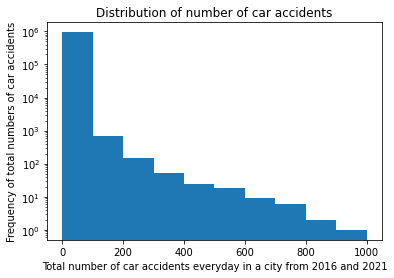

In [ ]:
bins_limits_1 = []
accident_limit = 1000
for i in range(0, accident_limit+100, 100):
  bins_limits_1.append(i)

fig, ax = plt.subplots()

ax.hist(
    x = accidents_date['number of car accidents'], 
    bins=bins_limits_1, 
    log=True
)


ax.set_title("Distribution of number of car accidents")
ax.set_xlabel("Total number of car accidents everyday in a city from 2016 and 2021")
ax.set_ylabel("Frequency of total numbers of car accidents")

As seen in the scatter plot, due to the presence of outliers for total car accidents in a day, we had to gradually filter out the outliers from top to bottom and observe its effect on the RMSE value of the linear regression

Text(0, 0.5, 'Total car accidents in American cities during each day from 2016 to 2021')

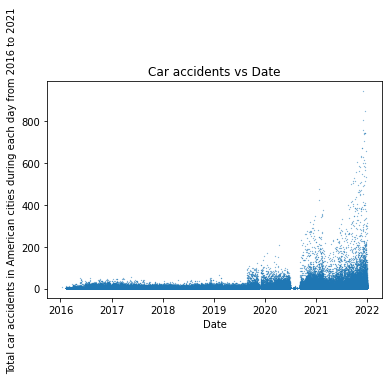

In [ ]:
fig, ax = plt.subplots()

ax.scatter(
    x = accidents_date["date"],
    y = accidents_date['number of car accidents'],
    s=0.05
)
ax.set_title("Car accidents vs Date")
ax.set_xlabel("Date")
ax.set_ylabel("Total car accidents in American cities during each day from 2016 to 2021")



As expected, the RMSE improved when removing the bins that contained the outliers which numbered less than 50 000 out of the nearly 940 000 points.

Text(0, 0.5, 'RMSE')

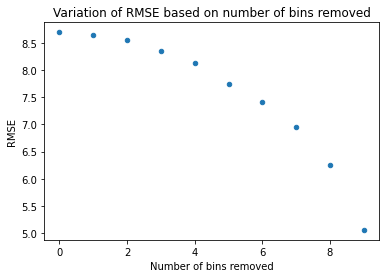

In [ ]:

RMSE_stored_1 = []
bins_filtered_1 = []

# A copy of the bins made to keep it as a reference when removing the elements of the original list.
bins_limits_default_1 = bins_limits_1.copy()

# 'null' string added to counteract the removal of the default number of bars in the for loop in its first iteration.
bins_limits_1.append('null')

for bin_removal in range(0, len(bins_limits_1)):
  
  # Keeps first 2 elements of bins_accidents to observe the data without outliers.
  if len(bins_limits_1) > 2:
    bins_limits_1.pop()
    bins_filtered_1.append(bin_removal)

    interest = accidents_date[accidents_date['number of car accidents'] < bins_limits_1[len(bins_limits_default_1)-bin_removal-1]]
      
    model = LinearRegression()
    model.fit(X=interest['days after start of 2016'].values.reshape(-1,1), y=interest['number of car accidents'])
    
    RMSE_stored_1.append(
        math.sqrt(
            mean_squared_error(
                y_true=interest['number of car accidents'], y_pred=model.predict(interest['days after start of 2016'].values.reshape(-1,1))
        )
            )
        )


fig, ax = plt.subplots()

ax.scatter(
    x = bins_filtered_1,
    y = RMSE_stored_1,
    s=20
)
ax.set_title("Variation of RMSE based on number of bins removed")
ax.set_xlabel("Number of bins removed")
ax.set_ylabel("RMSE")



## The number of inches of precipitation vs the days they occur 


Contrary to determining the relationship between the number of car accidents and the date in which they occured, we did not have to use the groupby method nor the size method, because the frequency in which precipitation values were attained during each day was of no interest to us. We were only interested in which day each individual precipitation value occured between 2016 and 2021.



In [ ]:
precip_date = df[['Start_Time', 'Precipitation(in)']].copy()

In [ ]:
precip_date["date"]=pd.to_datetime(precip_date["Start_Time"]).dt.date
precip_date['2016_start'] = '2016-01-01'
precip_date['basedate'] = pd.to_datetime(precip_date['2016_start']).dt.date
precip_date['days after start of 2016'] = (precip_date['date'] - precip_date['basedate']).dt.days

precip_date['Precipitation(in)'] = most_correlative_data_imputed['Precipitation(in)']

# Due to small mishaps, there are negative values in the 'Precipitation(in)' column post-imputation.
precip_date = precip_date.loc[precip_date["Precipitation(in)"]>=0]

In [ ]:
precip_date

,Start_Time,Precipitation(in),date,2016_start,basedate,days after start of 2016
0,2016-02-08 00:37:08,0.000000,2016-02-08,2016-01-01,2016-01-01,38
1,2016-02-08 05:56:20,0.020000,2016-02-08,2016-01-01,2016-01-01,38
2,2016-02-08 06:15:39,0.020000,2016-02-08,2016-01-01,2016-01-01,38
3,2016-02-08 06:51:45,0.007379,2016-02-08,2016-01-01,2016-01-01,38
4,2016-02-08 07:53:43,0.010000,2016-02-08,2016-01-01,2016-01-01,38
...,...,...,...,...,...,...
2845337,2019-08-23 18:03:25,0.000000,2019-08-23,2016-01-01,2016-01-01,1330
2845338,2019-08-23 19:11:30,0.000000,2019-08-23,2016-01-01,2016-01-01,1330
2845339,2019-08-23 19:00:21,0.000000,2019-08-23,2016-01-01,2016-01-01,1330
2845340,2019-08-23 19:00:21,0.000000,2019-08-23,2016-01-01,2016-01-01,1330


As seen in the scatter plot, the same situation occured as the previous plot. We had to gradually filter out the precipitation outliers from top to bottom and observe its effect on the RMSE value of the linear regression

Text(0, 0.5, 'Precipitation(in)')

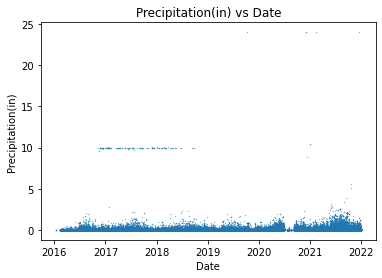

In [ ]:
plt.scatter(precip_date["date"], precip_date["Precipitation(in)"], s = 0.05)
plt.title('Precipitation(in) vs Date')
plt.xlabel('Date')
plt.ylabel('Precipitation(in)')

From the logarithmically scaled histogram, the large majority of precipitation for each car accident in an American city from 2016 to 2021 were lower than 5 inches.

Text(0, 0.5, 'Frequency of precipitation')

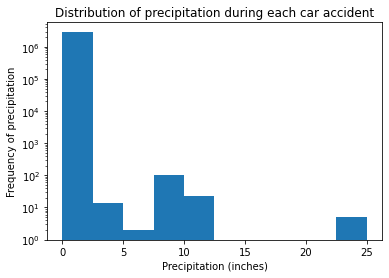

In [ ]:
bins_limits_2 = []
precip_limit_iterations = 10

for i in range(0, precip_limit_iterations+1, 1):
  bins_limits_2.append(i*2.5)


fig, ax = plt.subplots()

ax.hist(
    x = precip_date["Precipitation(in)"], 
    bins=bins_limits_2, 
    log=True
)

ax.set_title("Distribution of precipitation during each car accident")
ax.set_xlabel("Precipitation (inches)")
ax.set_ylabel("Frequency of precipitation")

As expected, the RMSE improved when removing the bins that contained the outliers; however, there was a dramatic drop in the RMSE. This was due to the fact that once 3 bars remained, only less than 20 outlier was present, whereas it had more than 100 prior to this.

Text(0, 0.5, 'RMSE')

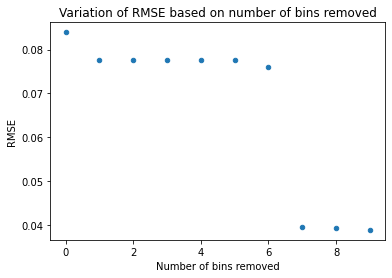

In [ ]:
RMSE_stored_2 = []
bins_filtered_2 = []
bins_limits_default_2 = bins_limits_2.copy()

bins_limits_2.append('null')

for bin_removal in range(0, len(bins_limits_2)):
  
  if len(bins_limits_2) > 2:
    bins_limits_2.pop()
    bins_filtered_2.append(bin_removal)

    interest = precip_date[precip_date["Precipitation(in)"] <= bins_limits_2[len(bins_limits_default_2)-bin_removal-1]]
      
    model = LinearRegression()
    model.fit(X=interest['days after start of 2016'].values.reshape(-1,1), y=interest["Precipitation(in)"])
    
    RMSE_stored_2.append(
        math.sqrt(
            mean_squared_error(
                y_true=interest['Precipitation(in)'], y_pred=model.predict(interest['days after start of 2016'].values.reshape(-1,1))
        )
            )
        )


fig, ax = plt.subplots()

ax.scatter(
    x = bins_filtered_2,
    y = RMSE_stored_2,
    s=20
)
ax.set_title("Variation of RMSE based on number of bins removed")
ax.set_xlabel("Number of bins removed")
ax.set_ylabel("RMSE")



## The number of car accidents vs. the precipitation 

To determine the relationship between the number of car accidents and the precipitaton, we had to use the groupby method and the size method to calculate the number of car accidents that occured for each precipitation value. The majority of car accidents reported in the original dataset occured when there was little to no precipitation at all.



In [ ]:
accidents_precip = precip_date.groupby(["Precipitation(in)"],as_index=False).size()
accidents_precip = accidents_precip.rename(columns={'size': 'number of car accidents'})

accidents_precip

,Precipitation(in),number of car accidents
0,0.000000,2104242
1,0.000004,2
2,0.000017,9
3,0.000031,3
4,0.000044,9
...,...,...
838,10.010000,1
839,10.020000,3
840,10.050000,1
841,10.400000,2


From the scatter plot, we noticed that the number of car accidents that occured without any precipitation was extremely high to the point that the y-axis scale had to be modified to a scale of 10^6 to accomodate said plot point.

Text(0, 0.5, 'number of car accidents')

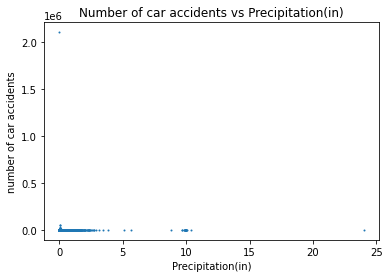

In [ ]:
fig, ax = plt.subplots()

ax.scatter(
    x = accidents_precip["Precipitation(in)"],
    y = accidents_precip['number of car accidents'],
    s=1
)


ax.set_title("Number of car accidents vs Precipitation(in)")
ax.set_xlabel("Precipitation(in)")
ax.set_ylabel('number of car accidents')

With the aforementioned observation of the scatter plot above in mind, the RMSE value was inevitably going to be extremely high.

In [ ]:
model = LinearRegression()
model.fit(X=accidents_precip["Precipitation(in)"].values.reshape(-1,1), y=accidents_precip['number of car accidents'])
    
math.sqrt(
            mean_squared_error(
                y_true=accidents_precip['number of car accidents'], y_pred=model.predict(accidents_precip["Precipitation(in)"].values.reshape(-1,1))
        )
            )
        

72476.58133977464

## Second attempt for Number of Car Accidents vs. Precipitation

The above RMSE is way too high to draw a substantial conclusion due to that one outlier at x=0.0. So, we adjusted the graph conditions so that no precipitation values less than 0.5 or greater than 5 would be included in our new graph representation. The RMSE that follows was much nicer. All we do is just run the same code under a different prefix in the variable name ("butchered") so that the two processes are distinct.


In [ ]:
butchered_precip_date = df[['Start_Time', 'Precipitation(in)']].copy()

In [ ]:
butchered_precip_date["date"]=pd.to_datetime(butchered_precip_date["Start_Time"]).dt.date
butchered_precip_date['2016_start'] = '2016-01-01'
butchered_precip_date['basedate'] = pd.to_datetime(butchered_precip_date['2016_start']).dt.date
butchered_precip_date['days after start of 2016'] = (butchered_precip_date['date'] - butchered_precip_date['basedate']).dt.days

butchered_precip_date['Precipitation(in)'] = most_correlative_data_imputed['Precipitation(in)']

butchered_precip_date = butchered_precip_date.loc[(butchered_precip_date['Precipitation(in)']>0.5) & (butchered_precip_date["Precipitation(in)"]<5)]

In [ ]:
butchered_accidents_precip = butchered_precip_date.groupby(["Precipitation(in)"],as_index=False).size()
butchered_accidents_precip = butchered_accidents_precip.rename(columns={'size': 'number of car accidents'})

butchered_accidents_precip

,Precipitation(in),number of car accidents
0,0.51,161
1,0.52,174
2,0.53,144
3,0.54,135
4,0.55,99
...,...,...
151,2.75,1
152,2.85,1
153,3.09,1
154,3.42,1


By removing the precipitation values that are bigger than 0.5 but less than 5, the scatter plot of the above dataset gave a more interesting visualization, because it appeared as an exponential graph.

Text(0, 0.5, 'number of car accidents')

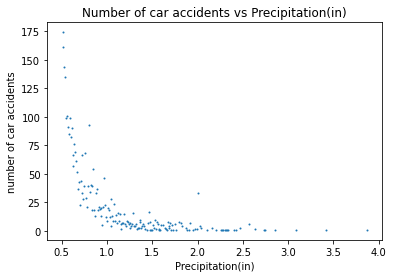

In [ ]:
fig, ax = plt.subplots()

ax.scatter(
    x = butchered_accidents_precip["Precipitation(in)"],
    y = butchered_accidents_precip['number of car accidents'],
    s=1
)


ax.set_title("Number of car accidents vs Precipitation(in)")
ax.set_xlabel("Precipitation(in)")
ax.set_ylabel('number of car accidents')

In [ ]:
model = LinearRegression()
model.fit(X=butchered_accidents_precip["Precipitation(in)"].values.reshape(-1,1), y=butchered_accidents_precip['number of car accidents'])
    
math.sqrt(
            mean_squared_error(
                y_true=butchered_accidents_precip['number of car accidents'], y_pred=model.predict(butchered_accidents_precip["Precipitation(in)"].values.reshape(-1,1))
        )
            )
        

25.72443430677479

Since the graph was of an exponential form, we figured that applying a logarithmic function to the y-axis' column and making a new column out of it might help us get a better regression and RMSE, so that's exactly what we did. 

In [ ]:
butchered_accidents_precip["Log Accidents"] = np.log(butchered_accidents_precip["number of car accidents"])

In [ ]:
butchered_accidents_precip.head()

,Precipitation(in),number of car accidents,Log Accidents
0,0.51,161,5.081404
1,0.52,174,5.159055
2,0.53,144,4.969813
3,0.54,135,4.905275
4,0.55,99,4.595120


In [ ]:
model = LinearRegression()
model.fit(X=butchered_accidents_precip["Precipitation(in)"].values.reshape(-1,1), y=butchered_accidents_precip['Log Accidents'])
    
math.sqrt(
            mean_squared_error(
                y_true=butchered_accidents_precip['Log Accidents'], y_pred=model.predict(butchered_accidents_precip["Precipitation(in)"].values.reshape(-1,1))
        )
            )



0.8618052163973717

Text(0, 0.5, 'number of car accidents')

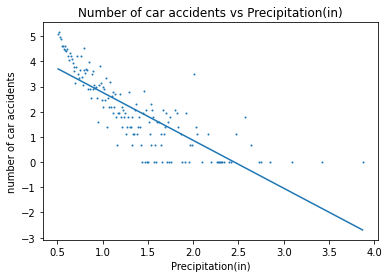

In [ ]:
fig, ax = plt.subplots()

ax.scatter(
    x = butchered_accidents_precip["Precipitation(in)"],
    y = butchered_accidents_precip['Log Accidents'],
    s=1
)

X = butchered_accidents_precip["Precipitation(in)"].values.reshape(-1,1)
plt.plot(X, model.predict(X))
ax.set_title("Log of number of car accidents vs Precipitation(in)")
ax.set_xlabel("Precipitation(in)")
ax.set_ylabel('Log of number of car accidents')

The above graph is essentially the result of an alternate way to do exponential regression by scaling it so that linear regression is possible. 

The fact that the RMSE is 0.86 on this graph, in our view, just goes to show how big of a difference a bit of data manipulation can make in how data gets relayed to a non-sciency reader (i.e. more graphs, please), going from a graph that just looks like noise, to a graph that actually is conveying something. 

# Conclusion

Through imputing precipitation values based on the best (possibly) related weather data and adjusting the limits of the data we view at the end with our final graph (as well as scaling the y-axis logarithmically for a more accurate rmse calculation), we have found that through proper working through a dataset of this size, and manipulating it accordingly, that a correlation can be found between inches of precipitation and number of car accidents. The correlation, in our findings, show that the slope is negative, meaning that the more precipitation there is, the less car accidents there are. This is a very imperfect study, of course, but with the data we had, even if the conclusion we came to was still the opposite of what we expected (namely, a positive slope), we still came to a conclusion, which hopefully conveys the high level of importance that data science has and will have for years to come. 

# Citations

- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.
- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.